In [1]:
import sys
sys.path.append("..")

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt

import vaalianalyysi as va

In [2]:
A = "KV-2017"
B = "KV-2021"
R = "VIHR"
e19 = va.data.tulospalvelu.vaalit(A)
e23 = va.data.tulospalvelu.vaalit(B)

In [3]:
puolueet = e23.puoluetunnukset(["SDP", "KOK", "KESK", "PS", "VIHR", "RKP", "KD", "VAS", "LIIK"])
alueet = va.data.tulospalvelu.Vaalit.aluevastaavuudet(e19, e23)
v19 = e19.v(alueet, puolueet)
v23 = e23.v(alueet, puolueet)
n19 = e19.n(alueet)
n23 = e23.n(alueet)
r19 = v19 / n19
r23 = v23 / n23
dr = 100 * (r23 - r19)

In [4]:
pp = [(e23.puolueet[p].nimilyhenne_suomeksi, dr[i,:]) for i, p in enumerate(puolueet)] + [("MUUT", dr[-2,:]), ("ZZZ", dr[-1,:])]
pi = puolueet.index(e23.puoluetunnukset([R])[0])
u = pp[pi][1]

rr = []
for n, v in pp:
    if n == R:
        continue
    k, c, r, _, _ = scipy.stats.linregress(v, u)
    r2 = r * r
    rr.append((r2, r, k, v, u, n, R))
rr = sorted(rr)[::-1]

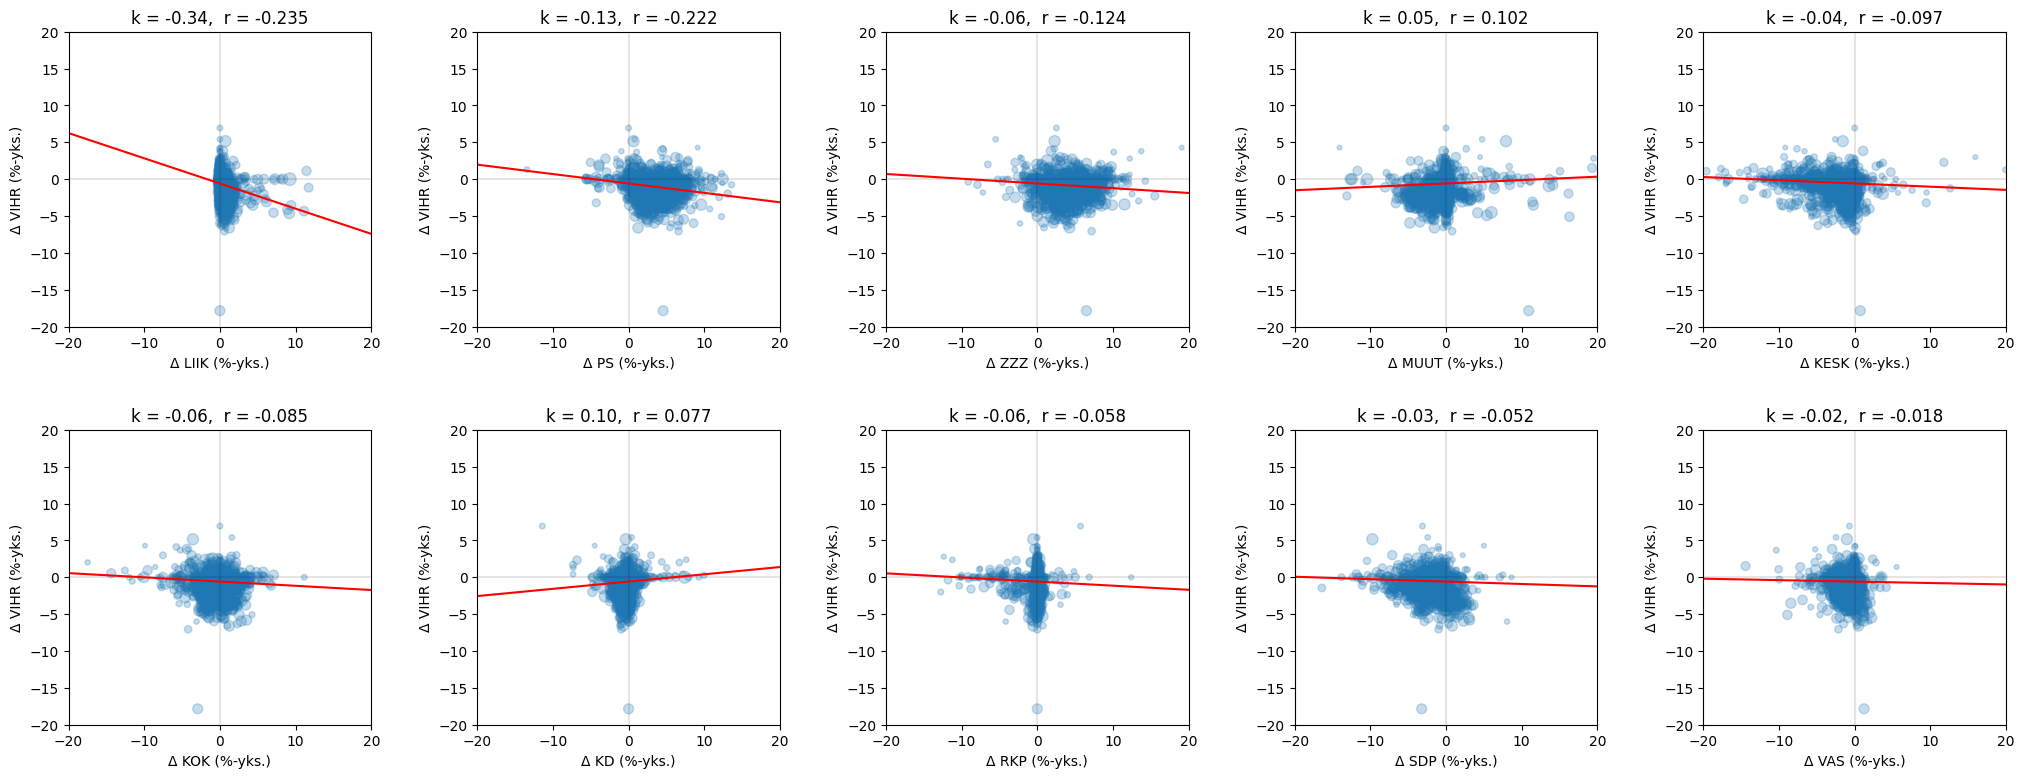

In [5]:
N = len(puolueet) + 1
W = 5
H = (N + W - 1) // W
fig, axs = plt.subplots(H, W, figsize=(25, 5 * H - 1))

s = np.sqrt(n19)
for i, (r2, r, k, v, u, n, m) in enumerate(rr):
    ax = axs[i // 5][i % 5]
    ax.axhline(y=0, color="k", alpha=0.10)
    ax.axvline(x=0, color="k", alpha=0.10)
    ax.scatter(v, u, s, alpha=0.25)
    ax.plot([-20, 20], k * np.array([-20, 20]) + c, color="red")
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)
    ax.set_title(f"k = {k:.2f},  r = {r:.3f}")
    ax.set_xlabel(f"Δ {n} (%-yks.)")
    ax.set_ylabel(f"Δ {m} (%-yks.)")
plt.subplots_adjust(hspace=0.35, wspace=0.35)
plt.savefig(f"{A}_{B}_{R}.png")
plt.show()